In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#test
city = citipy.nearest_city(22.99, 120.21).city_name
city

'tainan'

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

642

In [10]:
# Import the requests library.
import requests

# Import Api key
from config import open_weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

#set up the base url 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + open_weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=a1059d16fb4d59b95ddb40d8b99e62e7


In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate (cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record{record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try: 
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record1 of Set 1 | vanavara
Processing Record2 of Set 1 | kontagora
Processing Record3 of Set 1 | hobart
Processing Record4 of Set 1 | carnarvon
Processing Record5 of Set 1 | barrow
Processing Record6 of Set 1 | san-pedro
Processing Record7 of Set 1 | port alfred
Processing Record8 of Set 1 | sao joao evangelista
Processing Record9 of Set 1 | albany
Processing Record10 of Set 1 | nevelsk
Processing Record11 of Set 1 | naryan-mar
Processing Record12 of Set 1 | bolshegrivskoye
City not found. Skipping...
Processing Record13 of Set 1 | maniitsoq
Processing Record14 of Set 1 | uruzgan
Processing Record15 of Set 1 | tasiilaq
Processing Record16 of Set 1 | honiara
Processing Record17 of Set 1 | rylsk
Processing Record18 of Set 1 | palmer
Processing Record19 of Set 1 | rikitea
Processing Record20 of Set 1 | matagami
Processing Record21 of Set 1 | kangaatsiaq
Processing Record22 of Set 1 | daru
Processing Record23 of Set 1 

Processing Record36 of Set 4 | klyuchi
Processing Record37 of Set 4 | khuzhir
Processing Record38 of Set 4 | butaritari
Processing Record39 of Set 4 | port hueneme
Processing Record40 of Set 4 | ca mau
Processing Record41 of Set 4 | sidhi
Processing Record42 of Set 4 | beira
Processing Record43 of Set 4 | dicabisagan
Processing Record44 of Set 4 | mahebourg
Processing Record45 of Set 4 | esperance
Processing Record46 of Set 4 | moindou
Processing Record47 of Set 4 | ulladulla
Processing Record48 of Set 4 | oxbow
Processing Record49 of Set 4 | gravdal
Processing Record50 of Set 4 | pevek
Processing Record1 of Set 5 | petropavlovsk-kamchatskiy
Processing Record2 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record3 of Set 5 | muhos
Processing Record4 of Set 5 | vavoua
Processing Record5 of Set 5 | roald
Processing Record6 of Set 5 | tromso
Processing Record7 of Set 5 | faanui
Processing Record8 of Set 5 | aksha
Processing Record9 of Set 5 | nerchinskiy zavod
Processing Rec

Processing Record33 of Set 8 | sao domingos do prata
Processing Record34 of Set 8 | pahrump
Processing Record35 of Set 8 | flic en flac
Processing Record36 of Set 8 | bandundu
Processing Record37 of Set 8 | mbuji-mayi
Processing Record38 of Set 8 | okhotsk
Processing Record39 of Set 8 | shkotovo-22
City not found. Skipping...
Processing Record40 of Set 8 | samarai
Processing Record41 of Set 8 | juanjui
Processing Record42 of Set 8 | manitouwadge
Processing Record43 of Set 8 | mitsamiouli
Processing Record44 of Set 8 | angoche
Processing Record45 of Set 8 | esmeraldas
Processing Record46 of Set 8 | vizinga
Processing Record47 of Set 8 | little current
Processing Record48 of Set 8 | mastic beach
Processing Record49 of Set 8 | terrace bay
Processing Record50 of Set 8 | nueva loja
Processing Record1 of Set 9 | bathsheba
Processing Record2 of Set 9 | cabedelo
Processing Record3 of Set 9 | anadyr
Processing Record4 of Set 9 | mitu
Processing Record5 of Set 9 | chokurdakh
Processing Record6 o

Processing Record24 of Set 12 | ogulin
Processing Record25 of Set 12 | uribia
Processing Record26 of Set 12 | luganville
Processing Record27 of Set 12 | port antonio
Processing Record28 of Set 12 | nautla
Processing Record29 of Set 12 | humaita
Processing Record30 of Set 12 | klaeng
Processing Record31 of Set 12 | novooleksiyivka
Processing Record32 of Set 12 | storforshei
Processing Record33 of Set 12 | ken caryl
Processing Record34 of Set 12 | beloha
Processing Record35 of Set 12 | kachug
Processing Record36 of Set 12 | nuuk
Processing Record37 of Set 12 | meyungs
City not found. Skipping...
Processing Record38 of Set 12 | shimoda
Processing Record39 of Set 12 | obo
Processing Record40 of Set 12 | hambantota
Processing Record41 of Set 12 | pecos
Processing Record42 of Set 12 | razdolnoye
Processing Record43 of Set 12 | maloy
Processing Record44 of Set 12 | yarensk
Processing Record45 of Set 12 | jalu
Processing Record46 of Set 12 | sorland
Processing Record47 of Set 12 | aleksandrov 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vanavara,60.3400,102.2797,-8.91,95,99,6.62,RU,2022-02-07 20:22:40
1,Kontagora,10.3999,5.4695,81.70,15,33,4.61,NG,2022-02-07 20:22:40
2,Hobart,-42.8794,147.3294,58.86,86,75,0.00,AU,2022-02-07 20:18:09
3,Carnarvon,-24.8667,113.6333,72.39,58,2,23.06,AU,2022-02-07 20:22:41
4,Barrow,71.2906,-156.7887,-27.38,75,20,6.91,US,2022-02-07 20:22:41
5,San-Pedro,4.7485,-6.6363,79.11,84,61,7.81,CI,2022-02-07 20:22:03
6,Port Alfred,-33.5906,26.8910,73.81,90,41,8.39,ZA,2022-02-07 20:22:42
7,Sao Joao Evangelista,-18.5478,-42.7633,73.06,92,100,2.17,BR,2022-02-07 20:22:42
8,Albany,42.6001,-73.9662,39.58,80,100,3.06,US,2022-02-07 20:21:41
9,Nevelsk,46.6733,141.8633,-7.17,72,100,7.23,RU,2022-02-07 20:22:43


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

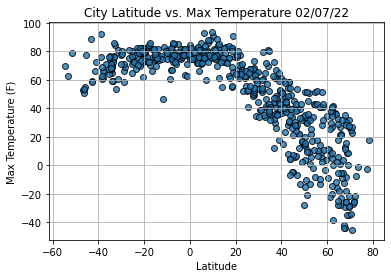

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

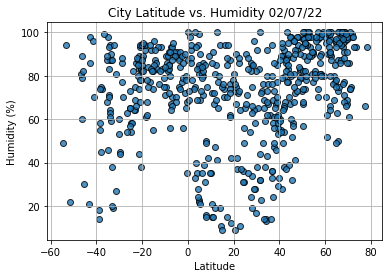

In [27]:
# Build the scatter plot for latitude vs. % humidity.
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

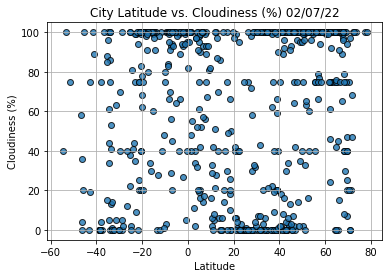

In [28]:
# Build the scatter plot for latitude vs. %cloudiness.
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

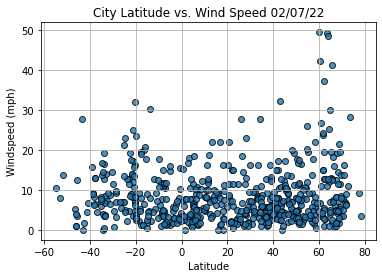

In [29]:
# Build the scatter plot for latitude vs. windspeed (mph).
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vanavara,60.3400,102.2797,-8.91,95,99,6.62,RU,2022-02-07 20:22:40
1,Kontagora,10.3999,5.4695,81.70,15,33,4.61,NG,2022-02-07 20:22:40
4,Barrow,71.2906,-156.7887,-27.38,75,20,6.91,US,2022-02-07 20:22:41
5,San-Pedro,4.7485,-6.6363,79.11,84,61,7.81,CI,2022-02-07 20:22:03
8,Albany,42.6001,-73.9662,39.58,80,100,3.06,US,2022-02-07 20:21:41
...,...,...,...,...,...,...,...,...,...
580,Lata,40.1629,-8.3327,50.41,59,2,3.94,PT,2022-02-07 20:38:32
581,Yerbogachen,61.2767,108.0108,-22.36,100,99,4.14,RU,2022-02-07 20:38:32
582,Amapa,1.0000,-52.0000,74.84,98,100,3.51,BR,2022-02-07 20:38:33
583,Gat,31.6100,34.7642,54.39,100,7,4.83,IL,2022-02-07 20:38:33


In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

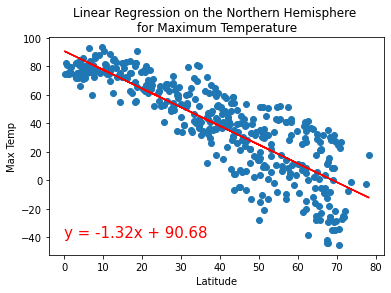

In [74]:
# Linear regression max temp on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(0,-40))


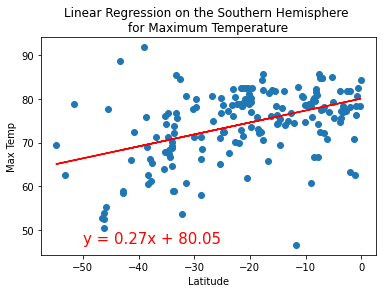

In [78]:
# Linear regression humidity on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,47))

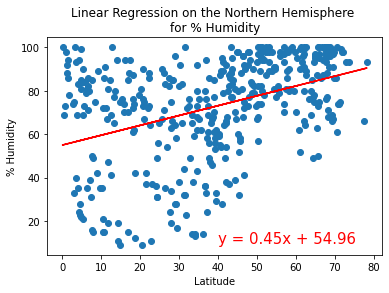

In [47]:
# Linear regression humidity on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity',(40,10))

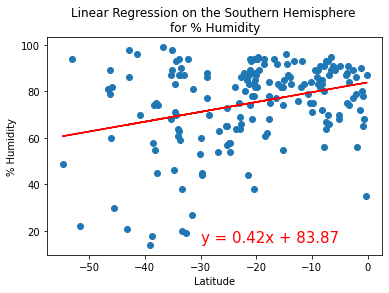

In [79]:
# Linear regression humidity on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity',(-30,15))

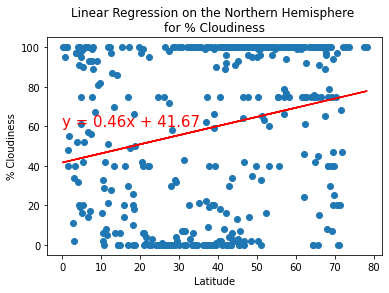

In [80]:
# Linear regression cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(0,60))

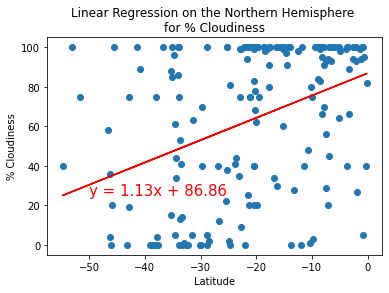

In [73]:
# Linear regression cloudiness on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,25))

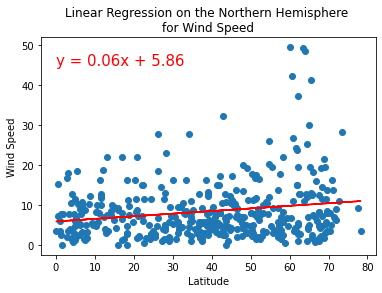

In [64]:
# Linear regression wind speed on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed (mph)',(0,45))

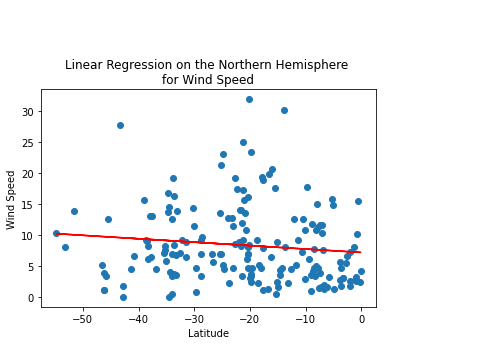

In [66]:
# Linear regression wind speed on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(0,45))

In [82]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import gkey

In [83]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Vanavara,60.3400,102.2797,-8.91,95,99,6.62,RU,2022-02-07 20:22:40
1,1,Kontagora,10.3999,5.4695,81.70,15,33,4.61,NG,2022-02-07 20:22:40
2,2,Hobart,-42.8794,147.3294,58.86,86,75,0.00,AU,2022-02-07 20:18:09
3,3,Carnarvon,-24.8667,113.6333,72.39,58,2,23.06,AU,2022-02-07 20:22:41
4,4,Barrow,71.2906,-156.7887,-27.38,75,20,6.91,US,2022-02-07 20:22:41


In [84]:
city_data_df.dtypes

City_ID         int64
City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [92]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

# Heatmap of temperature
# 1. Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# 2. Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# 3. Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# 4. Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], 
                                 dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [94]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [95]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, 
                                 dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [96]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, 
                                 dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [101]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.count()
preferred_cities_df.dropna()
preferred_cities_df.head(10)

What is the minimum temperature you would like for your trip? 50
What is the maximum temperature you would like for your trip? 80


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,Hobart,-42.8794,147.3294,58.86,86,75,0.00,AU,2022-02-07 20:18:09
3,3,Carnarvon,-24.8667,113.6333,72.39,58,2,23.06,AU,2022-02-07 20:22:41
5,5,San-Pedro,4.7485,-6.6363,79.11,84,61,7.81,CI,2022-02-07 20:22:03
6,6,Port Alfred,-33.5906,26.8910,73.81,90,41,8.39,ZA,2022-02-07 20:22:42
7,7,Sao Joao Evangelista,-18.5478,-42.7633,73.06,92,100,2.17,BR,2022-02-07 20:22:42
14,14,Honiara,-9.4333,159.9500,78.85,89,100,6.13,SB,2022-02-07 20:22:45
17,17,Rikitea,-23.1203,-134.9692,78.66,75,35,12.71,PF,2022-02-07 20:22:46
20,20,Daru,-9.0763,143.2092,78.44,86,100,3.56,PG,2022-02-07 20:22:47
24,24,Moratuwa,6.7730,79.8816,76.26,80,93,10.69,LK,2022-02-07 20:22:49
28,28,Lebu,-37.6167,-73.6500,65.37,74,0,13.09,CL,2022-02-07 20:22:50


In [102]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Hobart,AU,58.86,-42.8794,147.3294,
3,Carnarvon,AU,72.39,-24.8667,113.6333,
5,San-Pedro,CI,79.11,4.7485,-6.6363,
6,Port Alfred,ZA,73.81,-33.5906,26.8910,
7,Sao Joao Evangelista,BR,73.06,-18.5478,-42.7633,
14,Honiara,SB,78.85,-9.4333,159.9500,
17,Rikitea,PF,78.66,-23.1203,-134.9692,
20,Daru,PG,78.44,-9.0763,143.2092,
24,Moratuwa,LK,76.26,6.7730,79.8816,
28,Lebu,CL,65.37,-37.6167,-73.6500,


In [ ]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": gkey
}